# Numpy, Scipy and Matplotlib

## Importing Data from Text files
---

### Method 1 - Using Lists

In [1]:
f = open('data/rain_data.txt','r') # Create a file pointer with syntax as open(filename,access type)
contents = f.readlines()      # Reads contents of the file into a list
y = []
sec = []
rain = []
for line in contents:
    a, b, c = line.split()
    y.append(a)
    sec.append(b)
    rain.append(c)
f.close()

### Method 2 - Using Numpy Arrays
---

In [2]:
import numpy as np

f = open('data/rain_data.txt','r')
contents = f.readlines()
l = len(contents)
y = np.zeros(l,dtype=np.int16)
sec = np.zeros(l)
rain = np.zeros(l)

i = 0
for line in contents:
    y[i], sec[i], rain[i] = line.split()
    i += 1
print sec
print sec.shape
print np.shape(sec)

[   1.0019    1.0089    1.0158 ...,  220.4157  220.4227    1.0784]
(30597,)
(30597,)


## Writing Data to Text Files
---

In [3]:
import numpy as np

f = open('data/rain_data_written.txt','w')

i = 0
for line in range(0,30597):
    data = str(y[i])+'\t'+str(sec[i])+'\t'+str(rain[i])+'\n'
    f.write(data)
    i += 1
f.close()

## Exercise 3
---

Write a program to find the first 12 Fibonacci numbers. In a Fibonacci series/sequence, if $F_n$ is the $n^{th}$ term of the series, (provided $n \ge 2$) then it can be given in terms of the previous 2 terms, $F_{n-1}$ and $F_{n-2}$ by the recurrence relation,
$$ F_n = F_{n-1} + F_{n-2}$$
Find all the values till 12th term ($F_{12}$), save them and print them using loops. Take $F_0$ = 0 and $F_1$ = 1. **Use numpy arrays. Set the data type to be int8. Do you notice anything strange? Set the data type to be int16 and repeat. Do you notice anything strange?** If yes/no, can you guess what could be the reason?

## Exercise 4
---

Assuming Surface Temperature, $T_s = 30^\circ C$ and Surface Pressure, $P_s = 10^5 Pa$ and given following data:

||||||||||||||||
|------------------------------------------------------------------------------------------|
| Z (Altitude in km)|0.00|0.10|0.30|0.50|1.00|2.00|3.00|4.00|5.00|6.00|7.00|8.00|9.00|10.0 |
|RH (Relative Humidity in %)|60.0|70.0|80.0|75.0|60.0|50.0|80.0|90.0|60.0|40.0|20.0|5.0|2.0|1.0|


- Calculate $e_s(Z)$ which is given by $A\exp{\left[\frac{-B}{T}\right]}$, where $A = 2.53 \times 10^{11} Pa$ and $B = 5420 K$
- Calculate $e(Z)$ which is given by $\frac{RH \times e_s}{100}$. (Don't divide RH by 100)
* Calculate T(z) which is given by $T = T_S - \frac{gZ}{C_p}$, where $g = 9.806\ m/s^2$ and $C_p = 1005\ J/kgK$
* Calculate P(z) which is given by $P = P_s\exp{\frac{-gZ}{RT}}$, where $R = 287\ J/kgK$
* Calculate $\rho$(z) which is given by $\rho = \frac{P}{RT}$
* Calculate q(z) which is given by $q = 0.622\left[\ \frac{e}{P} \right]$
* Calculate W(z), given by $W = q\times\ \rho$
* Calculate h(z), given by $h = Lq + C_pT$. Where $L = 2.5006\times\ 10^6\ J/kg$. (Use T in K here)
* Calculate MSE(z), given by $MSE = h + gZ$
* Calculate Velocity v(z), which is given by the relation, $v = v_0\left(\exp\left[\frac{Z}{Z_s}\right] - 1\right)$, where, $Z_s = \frac{RT_s}{g}$ (Where $T_s$ is in Kelvin) and $v_0 = 100\ m/s$
* Calculate the total energy, $E = MSE + 0.5v^2$

In [4]:
# %load ../codes/Ex2.py
"""
Created on Wed Jun 15 16:26:33 2016

@author: kushal

Program for Problem 4
"""

import numpy as np

z = np.array([0.00, 0.10, 0.30, 0.50, 1.00, 2.00, 3.00, 4.00, 5.00, 6.00, 7.00, 8.00, 9.00, 10.0])
rh = np.array([60.0, 70.0, 80.0, 75.0, 60.0, 50.0, 80.0, 90.0, 60.0, 40.0, 20.0, 5.0, 2.0, 1.0])

print 'Z (Altitude in km): ', z
print 'RH (Relative Humidity in %): ', rh

Ts = 30.
Ps = 1.e5
A = 2.53e11
B = 5420.
g = 9.806
Cp = 1005.
R = 287.
L = 2.5006e6
v0 = 100.

T = np.zeros(z.shape[0])
Tk = np.array(T)
es = np.array(T)
e = np.array(T)
P = np.array(T)
rho = np.array(T)
q = np.array(T)
W = np.array(T)
h = np.array(T)
mse = np.array(T)
v = np.array(T)
E = np.array(T)

Tk = (Ts+273.15) - ((g*z*1000)/Cp)
T = Tk - 273.15
es = A * np.exp(-B/Tk)
e = (rh/100.) * es
P = Ps * np.exp((-g*z*1000)/(R*Tk))
rho = P/(R*Tk)
q = 0.622 * (e/P)
W = q * rho
h = (L*q) + (Cp * Tk)
mse = h + (g*z*1000)
Zs = R * ((Ts + 273.15)/g)
v = v0 * (np.exp((z*1000/Zs)) - 1)
E = mse + 0.5 * (v**2)

Z (Altitude in km):  [  0.    0.1   0.3   0.5   1.    2.    3.    4.    5.    6.    7.    8.
   9.   10. ]
RH (Relative Humidity in %):  [ 60.  70.  80.  75.  60.  50.  80.  90.  60.  40.  20.   5.   2.   1.]


## Reading NetCDF Files
---

We will make use of the netCDF4 module. We will mainly use the Dataset object. Please look into the datetime module of python and num2date object of netCDF4 for information on how to work with date and time.

In [5]:
# %load codes/read_netcdf.py
"""
Created on Thu Jun 16 22:49:45 2016

@author: kushal
"""

from netCDF4 import Dataset as dt # note the change of case in netCDF4
import numpy as np
# Dataset is a netcdf object, similar to a dictionary

filestr = 'data/ncfile2.nc' # This is the file name

ncfile = dt(filestr, 'r') # Create a netcdf object in read mode

#print ncfile.variables # To print all the variables

lat = np.array(ncfile.variables['latitude'][:],dtype=np.float32)

'''
Extract a variable named 'latitude' from the netcdf object as a
numpy array, having all it's entries as real numbers of type
float32 (32 bit real numbers).

The numpy array's name is lat
'''

lon = np.array(ncfile.variables['longitude'][:],dtype=np.float32)
t = np.array(ncfile.variables['time'][:],dtype=np.int32)
u = np.array(ncfile.variables['u10'][:],dtype=np.float32)
v = np.array(ncfile.variables['v10'][:],dtype=np.float32)
T = np.array(ncfile.variables['t2m'][:],dtype=np.float32)
al = np.array(ncfile.variables['al'][:],dtype=np.float32)

In [6]:
%matplotlib inline

## Plotting
---
We will use the Matplotlib module for plotting. More specifically, the pyplot module within matplotlib.

The matplotlib module is generally imported as 
``` python
import matplotlib.pyplot as plt                   # Easiest way to import matplotlib
from matplotlib import pyplot                     # Elaborate way and also, the full name has to be used
from matplotlib import pyplot as plt              # same as the first method but elaborate
```


### Line Plots
---

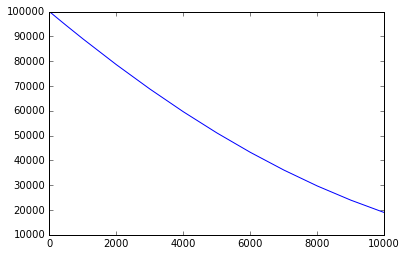

In [7]:
# Plot of Pressure vs Altitude

import matplotlib.pyplot as plt
plt.plot(z*1000,P, label='P')

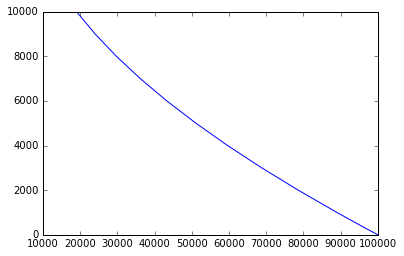

In [8]:
# Previous plot is incorrect because altitude generally goes in the Y-Axis. So, Let's try again
plt.plot(P,z*1000,label='P')

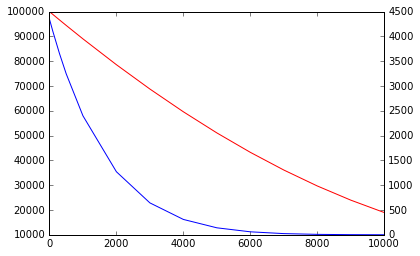

In [9]:
# Let's make a slightly advanced plot where we the X-Axis is common to two different plots
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(z*1000, P, 'r', label='P')
ax2.plot(z*1000, es, 'b', label='e_s')

### Superimposing Plots
---

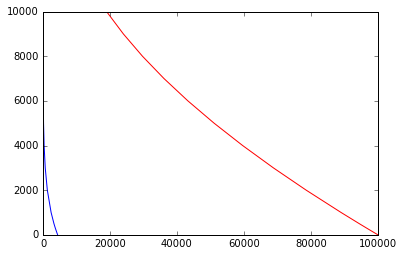

In [10]:
plt.plot(P,z*1000,'r')
plt.plot(es, z*1000,'b')

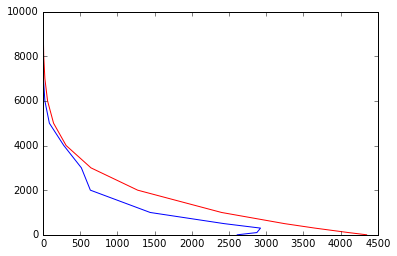

In [11]:
plt.plot(es, z*1000,'r')
plt.plot(e,z*1000,'b')

### Making Fancier Plots
---

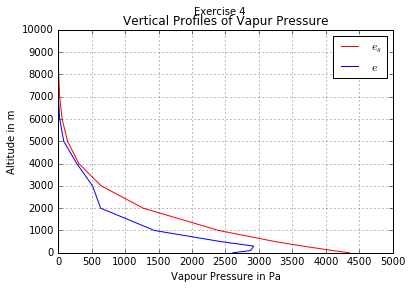

In [12]:
xt = np.linspace(0, 5000,11)              # For creating the required xticks
yt = np.linspace(0,10000,11)              # For creating the required yticks
plt.plot(es, z*1000,'r', label='$e_s$')   # Plots e_s Vs Z
plt.plot(e, z*1000, 'b',label='$e$')        # Plots Vapour Pressure vs Z
plt.xlabel('Vapour Pressure in Pa')       # Labels the X-Axis
plt.ylabel('Altitude in m')               # Labels the Y-Axis
plt.suptitle('Exercise 4')                # Creates a Supertitle
plt.title('Vertical Profiles of Vapur Pressure') # Create a Title
plt.xticks(xt)                            # Draws the required xicks
plt.yticks(yt)                            # Draws the required yticks
plt.axis([0, 5000, 0, 10000])             # Forces the plot to have limits as required
#[X_start, X_end, Y_start, Y_end]
plt.legend()                              # Draws the Legend
plt.grid('on')                            # Draws the grid
plt.savefig('eVsZ.png', format='png', dpi=200) # saves the figure in .png format

### Scatter Plot
---

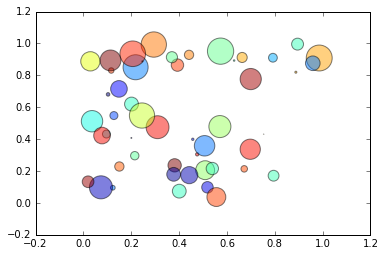

In [13]:
import numpy as np
import matplotlib.pyplot as plt


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)

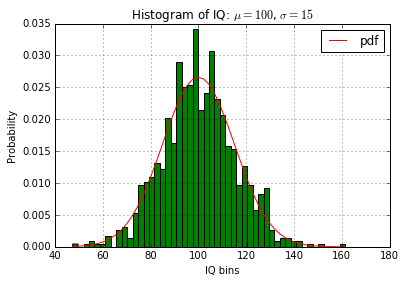

In [14]:
import matplotlib.mlab as mlab 
# Numerical Python functions written for compatability with MATLAB commands with the same names.

m , s = 100 , 15
iq = np.random.normal(m, s, 1000) 
# Setting a random Human IQ data, normally distributed with mean = 100, sd = 15

num_bins = 50 # Number of groups we want
n, bins, patches = plt.hist(iq, num_bins, normed=1, facecolor='green')
# n = counts in each group
# bins = array of edges. (n groups have n+1 edges)
# patches = other variables for making the histogram plot (not needed)
# normed = 1 or True, then it returns n as fraction. Else, returns n as plain numbers
# Sum of fractions = 1 and, sum of counts = total number of entries
l = mlab.normpdf(bins, m, s) # Creates the pdf of normal distribution
plt.plot(bins, l, 'r', label='pdf')
plt.xlabel('IQ bins')
plt.ylabel('Probability')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')
plt.axis()
plt.legend()
plt.grid('on')
plt.savefig('IQ_hist.png',format='png',dpi=200)

### Contour Plots
---
There are 2 variants:
```python
plt.contourf(x,y,z) # Filled contours
plt.contour(x,y,z)  # Only contour lines
```

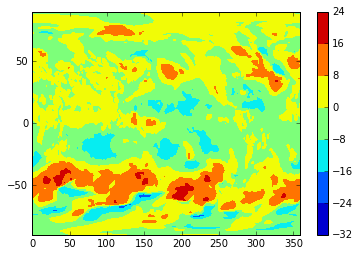

In [24]:
plt.contourf(lon, lat, u[5,:,:]) # Plots Filled contours only without contour lines
plt.colorbar() # Displays the colorbar

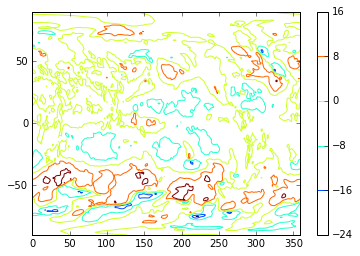

In [25]:
plt.contour(lon, lat, u[5,:,:]) # Plots only the contour lines
plt.colorbar()